In [1]:
%cd ~/bioinfo1/project/

/rna/hyemin/bioinfo1/project


In [3]:
!samtools view -F 3844 -b binfo1-work/CLIP-35L33G.bam > binfo1-work/CLIP-35L33G.filtered.bam
!samtools view -F 3844 -b binfo1-work/RNA-control.bam > binfo1-work/RNA-control.filtered.bam
# mapped, primary alignment, quality checked, no duplicate or supplementary reads

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

## gsnap-ab-read-counts

In [16]:
!featureCounts -a binfo1-work/gencode.gtf.gz -o binfo1-work/correlation/gsnap-star-read-counts.txt CLIP/alignments/gsnap/*.filtered.bam CLIP/alignments/star/*.filtered.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 8 BAM files                                      ||
||                                                                            ||
||                           CLIP-2J3.filtered.bam                            ||
||                           CLIP-35L33G.filtered.bam                         ||
||                           CLIP-Polyclonal.filtered.bam        

In [3]:
dfReadcount = pd.read_csv('binfo1-work/correlation/gsnap-star-read-counts.txt', sep='\t', comment='#', index_col=0)
dfReadcount.head()

,Chr,Start,End,Strand,Length,CLIP/alignments/gsnap/CLIP-2J3.filtered.bam,CLIP/alignments/gsnap/CLIP-35L33G.filtered.bam,CLIP/alignments/gsnap/CLIP-Polyclonal.filtered.bam,CLIP/alignments/gsnap/RNA-control.filtered.bam,CLIP/alignments/star/CLIP-2J3.filtered.bam,CLIP/alignments/star/CLIP-35L33G.filtered.bam,CLIP/alignments/star/CLIP-Polyclonal.filtered.bam,CLIP/alignments/star/RNA-control.filtered.bam
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,0,2,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,0,0,1
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0


In [4]:
bam_columns =dfReadcount.filter(regex='bam$', axis=1).columns
dColName = {col : col[len('CLIP/alignments/'):] for col in bam_columns}
dfReadcount.rename(columns = dColName, inplace = True)
dfReadcount.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,star/CLIP-35L33G.filtered.bam,star/CLIP-Polyclonal.filtered.bam,star/RNA-control.filtered.bam
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,0,2,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,0,0,1
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0


### correlation using TPM

In [5]:
dfReadcount_TPM =dfReadcount.copy()
bam_columns = dfReadcount_TPM.filter(regex='bam$', axis=1).columns
dfReadcount_TPM[[col + '_RPK' for col in bam_columns]] = dfReadcount_TPM[bam_columns].div(dfReadcount_TPM['Length'], axis=0)
total_RPK = dfReadcount_TPM.filter(regex='_RPK$', axis=1).sum()
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,...,star/CLIP-Polyclonal.filtered.bam,star/RNA-control.filtered.bam,gsnap/CLIP-2J3.filtered.bam_RPK,gsnap/CLIP-35L33G.filtered.bam_RPK,gsnap/CLIP-Polyclonal.filtered.bam_RPK,gsnap/RNA-control.filtered.bam_RPK,star/CLIP-2J3.filtered.bam_RPK,star/CLIP-35L33G.filtered.bam_RPK,star/CLIP-Polyclonal.filtered.bam_RPK,star/RNA-control.filtered.bam_RPK
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,...,0,0,0.001869,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,...,2,0,0.154545,0.000000,0.027273,0.000000,0.236364,0.0,0.018182,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,...,0,1,0.000492,0.000328,0.001641,0.000328,0.000164,0.0,0.000000,0.000164
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,...,0,0,0.004167,0.000000,0.000000,0.000000,0.004167,0.0,0.000000,0.000000
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [6]:
RPK_bam_columns = dfReadcount_TPM.filter(regex='RPK$', axis=1).columns
dfReadcount_TPM[RPK_bam_columns] = dfReadcount_TPM[RPK_bam_columns] * 1E6 / total_RPK
dfReadcount_TPM.rename(columns={col: col[:-len('_RPK')] + '_TPM' for col in RPK_bam_columns}, inplace=True)
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,...,star/CLIP-Polyclonal.filtered.bam,star/RNA-control.filtered.bam,gsnap/CLIP-2J3.filtered.bam_TPM,gsnap/CLIP-35L33G.filtered.bam_TPM,gsnap/CLIP-Polyclonal.filtered.bam_TPM,gsnap/RNA-control.filtered.bam_TPM,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,...,0,0,0.352615,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,...,2,0,29.154883,0.000000,6.409940,0.000000,49.915430,0.0,4.977985,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,...,0,1,0.092870,0.064557,0.385676,0.090162,0.034654,0.0,0.000000,0.052162
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,...,0,0,0.786039,0.000000,0.000000,0.000000,0.879919,0.0,0.000000,0.000000
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [7]:
dfReadcount_TPM.filter(regex='_TPM$', axis=1).sum()

gsnap/CLIP-2J3.filtered.bam_TPM           1000000.0
gsnap/CLIP-35L33G.filtered.bam_TPM        1000000.0
gsnap/CLIP-Polyclonal.filtered.bam_TPM    1000000.0
gsnap/RNA-control.filtered.bam_TPM        1000000.0
star/CLIP-2J3.filtered.bam_TPM            1000000.0
star/CLIP-35L33G.filtered.bam_TPM         1000000.0
star/CLIP-Polyclonal.filtered.bam_TPM     1000000.0
star/RNA-control.filtered.bam_TPM         1000000.0
dtype: float64

In [8]:
dfReadcount_TPM['gsnap/clip_enrichment_35L33G_TPM'] = dfReadcount_TPM['gsnap/CLIP-35L33G.filtered.bam_TPM'] / dfReadcount_TPM['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_TPM['gsnap/clip_enrichment_2J3_TPM'] = dfReadcount_TPM['gsnap/CLIP-2J3.filtered.bam_TPM'] / dfReadcount_TPM['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_TPM['gsnap/clip_enrichment_Polyclonal_TPM'] = dfReadcount_TPM['gsnap/CLIP-Polyclonal.filtered.bam_TPM'] / dfReadcount_TPM['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_TPM['star/clip_enrichment_35L33G_TPM'] = dfReadcount_TPM['star/CLIP-35L33G.filtered.bam_TPM'] / dfReadcount_TPM['star/RNA-control.filtered.bam_TPM']
dfReadcount_TPM['star/clip_enrichment_2J3_TPM'] = dfReadcount_TPM['star/CLIP-2J3.filtered.bam_TPM'] / dfReadcount_TPM['star/RNA-control.filtered.bam_TPM']
dfReadcount_TPM['star/clip_enrichment_Polyclonal_TPM'] = dfReadcount_TPM['star/CLIP-Polyclonal.filtered.bam_TPM'] / dfReadcount_TPM['star/RNA-control.filtered.bam_TPM']
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,...,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM,gsnap/clip_enrichment_35L33G_TPM,gsnap/clip_enrichment_2J3_TPM,gsnap/clip_enrichment_Polyclonal_TPM,star/clip_enrichment_35L33G_TPM,star/clip_enrichment_2J3_TPM,star/clip_enrichment_Polyclonal_TPM
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,NaN,inf,NaN,NaN,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,...,49.915430,0.0,4.977985,0.000000,NaN,inf,inf,NaN,inf,inf
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,...,0.034654,0.0,0.000000,0.052162,0.71601,1.030028,4.277579,0.0,0.664352,0.0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,...,0.879919,0.0,0.000000,0.000000,NaN,inf,NaN,NaN,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='bam$', axis=1)]].mean(axis=1)

Geneid
ENSMUSG00000102693.2       0.250
ENSMUSG00000064842.3       6.000
ENSMUSG00000051951.6       2.375
ENSMUSG00000102851.2       0.500
ENSMUSG00000103377.2       0.000
                          ...   
ENSMUSG00000064368.1    2922.250
ENSMUSG00000064369.1      16.875
ENSMUSG00000064370.1    3939.375
ENSMUSG00000064371.1      90.500
ENSMUSG00000064372.1    1779.750
Length: 55359, dtype: float64

In [10]:
dfReadcount_filter = (dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='bam$', axis=1)]] >= 5).all(axis=1)
dfReadcount_filtered = dfReadcount_TPM[dfReadcount_filter].filter(regex='clip_enrichment', axis=1).copy()

In [11]:
dfReadcount_l2TPM = np.log2(dfReadcount_filtered)

In [12]:
dfReadcount_l2TPM

,gsnap/clip_enrichment_35L33G_TPM,gsnap/clip_enrichment_2J3_TPM,gsnap/clip_enrichment_Polyclonal_TPM,star/clip_enrichment_35L33G_TPM,star/clip_enrichment_2J3_TPM,star/clip_enrichment_Polyclonal_TPM
Geneid,,,,,,
ENSMUSG00000103922.2,-0.898228,-0.816541,0.027300,0.849679,1.297546,2.837720
ENSMUSG00000033845.14,-0.158453,-0.453229,0.165981,-0.196232,-0.488674,0.132687
ENSMUSG00000025903.15,0.053220,-0.106091,0.356745,-0.071946,-0.226604,0.305692
ENSMUSG00000033813.16,-0.806278,-1.126042,-0.125438,-1.025216,-1.390824,-0.198877
ENSMUSG00000033793.13,-0.587602,-0.549322,-0.233354,-0.618651,-0.533441,-0.280378
...,...,...,...,...,...,...
ENSMUSG00000064367.1,-2.514774,-2.667669,-2.876418,-2.561095,-2.717218,-2.865712
ENSMUSG00000064368.1,-2.553036,-2.628965,-3.311819,-2.642024,-2.732316,-3.340512
ENSMUSG00000064370.1,-5.483423,-5.644866,-6.060188,-5.598531,-5.773497,-6.049961


In [13]:
dfReadcount_l2TPM.corr()

,gsnap/clip_enrichment_35L33G_TPM,gsnap/clip_enrichment_2J3_TPM,gsnap/clip_enrichment_Polyclonal_TPM,star/clip_enrichment_35L33G_TPM,star/clip_enrichment_2J3_TPM,star/clip_enrichment_Polyclonal_TPM
gsnap/clip_enrichment_35L33G_TPM,1.000000,0.905501,0.897347,0.939137,0.854855,0.844192
gsnap/clip_enrichment_2J3_TPM,0.905501,1.000000,0.895213,0.853501,0.940329,0.841726
gsnap/clip_enrichment_Polyclonal_TPM,0.897347,0.895213,1.000000,0.851659,0.850267,0.936684
star/clip_enrichment_35L33G_TPM,0.939137,0.853501,0.851659,1.000000,0.898024,0.892200
star/clip_enrichment_2J3_TPM,0.854855,0.940329,0.850267,0.898024,1.000000,0.889371
star/clip_enrichment_Polyclonal_TPM,0.844192,0.841726,0.936684,0.892200,0.889371,1.000000


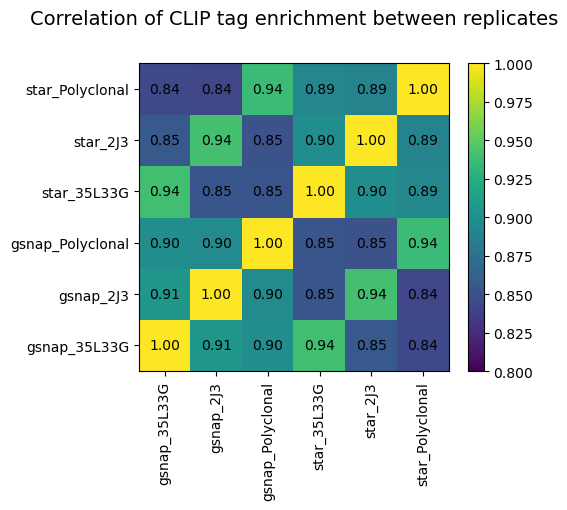

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
c = ax.pcolor(dfReadcount_l2TPM.corr(), vmin=0.8, vmax=1)
plt.viridis()
plt.colorbar(c)

ax.set_title('Correlation of CLIP tag enrichment between replicates', fontsize=14, y=1.1)

ax.set_xticks(np.arange(dfReadcount_l2TPM.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(dfReadcount_l2TPM.corr().shape[0]) + 0.5, minor=False)

lLabel = [col.split('/')[0] + '_' + col.split('_')[-2] for col in dfReadcount_l2TPM.columns]
ax.set_xticklabels(lLabel, rotation=90)
ax.set_yticklabels(lLabel)

for y in range(dfReadcount_l2TPM.corr().shape[0]):
    for x in range(dfReadcount_l2TPM.corr().shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % dfReadcount_l2TPM.corr().iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

In [15]:
dfReadcount_l2TPM.columns

Index(['gsnap/clip_enrichment_35L33G_TPM', 'gsnap/clip_enrichment_2J3_TPM',
       'gsnap/clip_enrichment_Polyclonal_TPM',
       'star/clip_enrichment_35L33G_TPM', 'star/clip_enrichment_2J3_TPM',
       'star/clip_enrichment_Polyclonal_TPM'],
      dtype='object')

Text(0.5, 0.92, 'Correlation of CLIP tag enrichment between replicates')

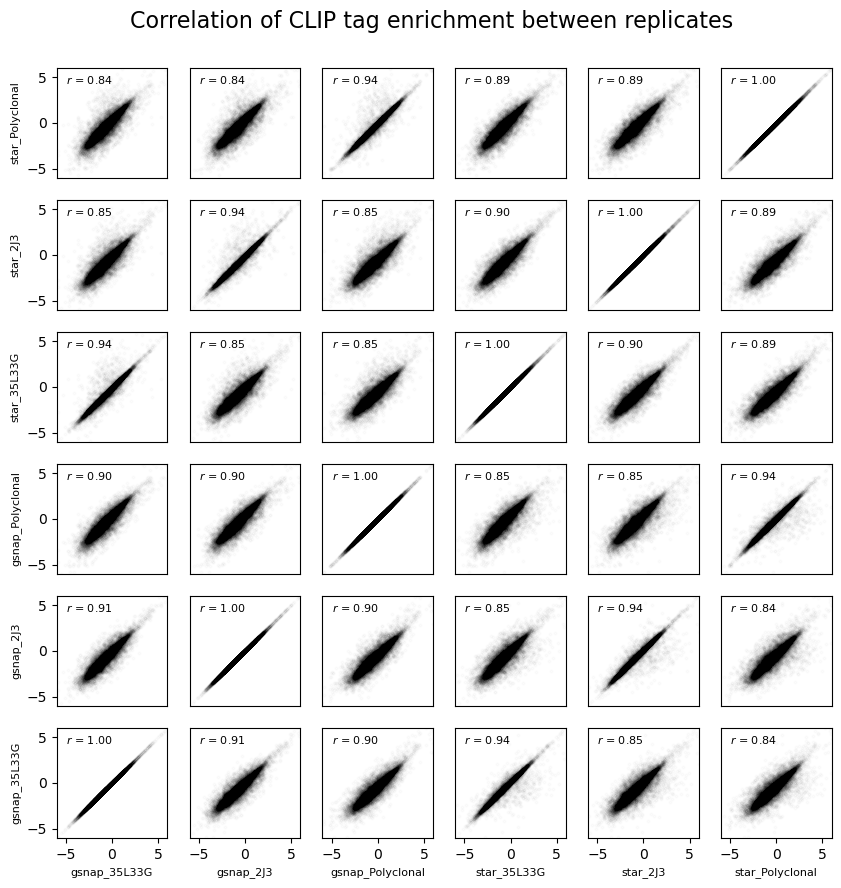

In [54]:
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
lColumns = dfReadcount_l2TPM.columns

for i in lColumns:
    for j in lColumns:
        ax = axes.flatten()[30 - 6 * lColumns.get_loc(j) + lColumns.get_loc(i)]
        ax.scatter(dfReadcount_l2TPM[i], dfReadcount_l2TPM[j], s=4, c='black', alpha=0.01)
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
        ax.set_xticks([])
        ax.set_yticks([])
        if lColumns.get_loc(j) == 0:
            ax.set_xlabel(i.split('/')[0] + '_' + i.split('_')[-2], fontsize=8)
            ax.set_xticks([-5, 0, 5])
        if lColumns.get_loc(i) == 0:
            ax.set_ylabel(j.split('/')[0] + '_' + j.split('_')[-2], fontsize=8)
            ax.set_yticks([-5, 0, 5])

        corr = stats.pearsonr(dfReadcount_l2TPM[i], dfReadcount_l2TPM[j])[0]
        ax.text(-5, 4, f'$r$ = {corr:.2f}', ha='left', va='bottom', fontsize=8)

fig.text(0.5, 0.92, 'Correlation of CLIP tag enrichment between replicates', fontsize=16, ha='center')

In [39]:
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

Text(0.5, 1.05, 'PCA of CLIP tag enrichment')

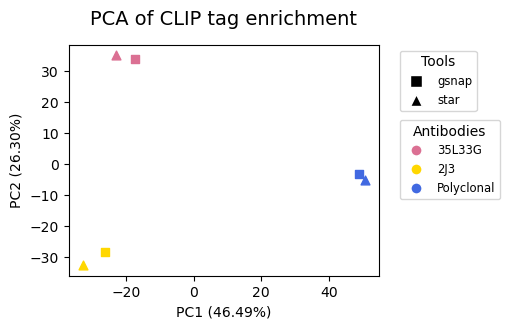

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))

pca = PCA(n_components=2)
l2pca = pca.fit_transform(dfReadcount_l2TPM.values.T)
explained_variance = pca.explained_variance_ratio_

lMarkers = ['s', '^']
lColors = ['palevioletred', 'gold', 'royalblue']
lMarkerNColor = [(marker, color) for marker in lMarkers for color in lColors]
        
for (pc1, pc2), label, (marker, color) in zip(l2pca, dfReadcount_l2TPM.columns, lMarkerNColor):
    ax.scatter(pc1, pc2, s=40, c=color, marker=marker)

tools_legend_handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='gsnap'),
                        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='star')]

# Custom legend handles for antibodies
colors_legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='palevioletred', markersize=8, label='35L33G'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='2J3'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='royalblue', markersize=8, label='Polyclonal')]

# Add legends to the plot
legend1 = ax.legend(handles=tools_legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Tools')
legend2 = ax.legend(handles=colors_legend_handles, bbox_to_anchor=(1.05, 0.7), loc='upper left', fontsize='small', title='Antibodies')
ax.add_artist(legend1)

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")

ax.set_title('PCA of CLIP tag enrichment', fontsize=14, y=1.05)

## 35L33G-read-counts

In [4]:
!featureCounts -a binfo1-work/gencode.gtf.gz -o binfo1-work/correlation/gsnap-35L33G-read-counts.txt CLIP/alignments/gsnap/CLIP-35L33G.filtered.bam CLIP/alignments/gsnap/RNA-control.filtered.bam binfo1-work/CLIP-35L33G.filtered.bam binfo1-work/RNA-control.filtered.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.filtered.bam                         ||
||                           RNA-control.filtered.bam                         ||
||                           CLIP-35L33G.filtered.bam            

In [56]:
import pandas as pd
dfReadcount = pd.read_csv('binfo1-work/correlation/gsnap-35L33G-read-counts.txt', sep='\t', comment='#', index_col=0)
dfReadcount.head()

,Chr,Start,End,Strand,Length,CLIP/alignments/gsnap/CLIP-35L33G.filtered.bam,CLIP/alignments/gsnap/RNA-control.filtered.bam,binfo1-work/CLIP-35L33G.filtered.bam,binfo1-work/RNA-control.filtered.bam
Geneid,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,2,2,4,1
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,0,0,3,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0


In [57]:
dColName = {'CLIP/alignments/gsnap/CLIP-35L33G.filtered.bam' : 'CLIP-35L33G.hyemin.bam', 'CLIP/alignments/gsnap/RNA-control.filtered.bam' : 'RNA-control.hyemin.bam',
            'binfo1-work/CLIP-35L33G.filtered.bam' : 'CLIP-35L33G.hyeshik.bam', 'binfo1-work/RNA-control.filtered.bam' : 'RNA-control.hyeshik.bam'}
dfReadcount.rename(columns = dColName, inplace = True)
dfReadcount.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.hyemin.bam,RNA-control.hyemin.bam,CLIP-35L33G.hyeshik.bam,RNA-control.hyeshik.bam
Geneid,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,2,2,4,1
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,0,0,3,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0


In [58]:
dfReadcount_TPM =dfReadcount.copy()
bam_columns =dfReadcount_TPM.filter(regex='bam$', axis=1).columns
dfReadcount_TPM[[col + '_RPK' for col in bam_columns]] =dfReadcount_TPM[bam_columns].div(dfReadcount_TPM['Length'], axis=0)
total_RPK =dfReadcount_TPM.filter(regex='_RPK$', axis=1).sum()
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.hyemin.bam,RNA-control.hyemin.bam,CLIP-35L33G.hyeshik.bam,RNA-control.hyeshik.bam,CLIP-35L33G.hyemin.bam_RPK,RNA-control.hyemin.bam_RPK,CLIP-35L33G.hyeshik.bam_RPK,RNA-control.hyeshik.bam_RPK
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,2,2,4,1,0.000328,0.000328,0.000656,0.000164
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,0,0,3,0,0.000000,0.000000,0.006250,0.000000
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [59]:
RPK_bam_columns = dfReadcount_TPM.filter(regex='RPK$', axis=1).columns
dfReadcount_TPM[RPK_bam_columns] = dfReadcount_TPM[RPK_bam_columns] * 1E6 / total_RPK
dfReadcount_TPM.rename(columns={col: col[:-len('_RPK')] + '_TPM' for col in RPK_bam_columns}, inplace=True)
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.hyemin.bam,RNA-control.hyemin.bam,CLIP-35L33G.hyeshik.bam,RNA-control.hyeshik.bam,CLIP-35L33G.hyemin.bam_TPM,RNA-control.hyemin.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,2,2,4,1,0.064557,0.090162,0.130437,0.085771
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,0,0,3,0,0.000000,0.000000,1.242002,0.000000
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [60]:
dfReadcount_TPM['clip_enrichment_hyemin'] = dfReadcount_TPM['CLIP-35L33G.hyemin.bam_TPM'] / dfReadcount_TPM['RNA-control.hyemin.bam_TPM']
dfReadcount_TPM['clip_enrichment_hyeshik'] = dfReadcount_TPM['CLIP-35L33G.hyeshik.bam_TPM'] / dfReadcount_TPM['RNA-control.hyeshik.bam_TPM']
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.hyemin.bam,RNA-control.hyemin.bam,CLIP-35L33G.hyeshik.bam,RNA-control.hyeshik.bam,CLIP-35L33G.hyemin.bam_TPM,RNA-control.hyemin.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM,clip_enrichment_hyemin,clip_enrichment_hyeshik
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,2,2,4,1,0.064557,0.090162,0.130437,0.085771,0.71601,1.520754
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,0,0,3,0,0.000000,0.000000,1.242002,0.000000,NaN,inf
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [61]:
dfReadcount_filter = (dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='bam$', axis=1)]] >= 30).all(axis=1)
dfReadcount_filtered = dfReadcount_TPM[dfReadcount_filter].copy()

Text(3.0, -5.5, '$r$ = 0.88')

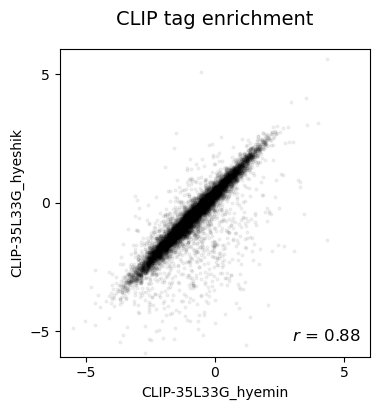

In [71]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

x = np.log2(dfReadcount_filtered['clip_enrichment_hyemin'])
y = np.log2(dfReadcount_filtered['clip_enrichment_hyeshik'])
ax.scatter(x, y, s=4, c='black', alpha=0.05)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xticks([-5, 0, 5])
ax.set_yticks([-5, 0, 5])

ax.set_xlabel('CLIP-35L33G_hyemin')
ax.set_ylabel('CLIP-35L33G_hyeshik')
ax.set_title('CLIP tag enrichment', fontsize=14, y=1.05)

corr = stats.pearsonr(x, y)[0]
ax.text(3.0, -5.5, f'$r$ = {corr:.2f}', ha='left', va='bottom', fontsize=12)